In [3]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import vars

In [4]:
user_name = vars.USER_NAME
password = vars.PASSWORD
schema_name = vars.SCHEMA_NAME
target_host = vars.TARGET_HOST
accident_table_name = vars.ACCIDENT_TABLE_NAME
vehicle_table_name = vars.VEHICLE_TABLE_NAME

In [5]:
engine = create_engine(f'postgresql://{user_name}:{password}@{target_host}:5432/postgres')

# Accident Infomation Visualization

In [6]:
sql_query = f"select * from {schema_name}.{accident_table_name}"
accident_infomation = pd.read_sql_query(sql_query, con=engine)

In [7]:
print(sql_query)

select * from kaggle.stg_accident_information


In [8]:
accident_infomation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132820 entries, 0 to 1132819
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   accident_index              1132820 non-null  object 
 1   first_road_class            1132820 non-null  object 
 2   first_road_number           1132820 non-null  float64
 3   second_road_class           1132820 non-null  object 
 4   second_road_number          1132820 non-null  float64
 5   accident_severity           1132820 non-null  object 
 6   date                        1132820 non-null  object 
 7   day_of_week                 1132820 non-null  object 
 8   junction_control            1132820 non-null  object 
 9   junction_detail             1132820 non-null  object 
 10  latitude                    1132820 non-null  float64
 11  light_conditions            1132820 non-null  object 
 12  local_authority_(district)  1132820 non-null  object 
 1

### It seems car accident is lower every years

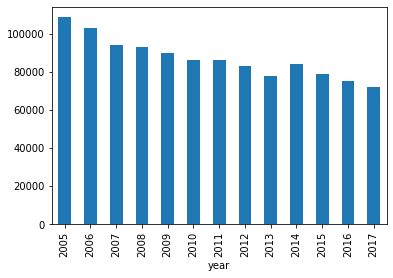

In [9]:
accident_infomation_year = accident_infomation.groupby("year")["accident_index"].count()
accident_infomation_year.plot.bar()
plt.show()

### Week day have more car accident than weekend

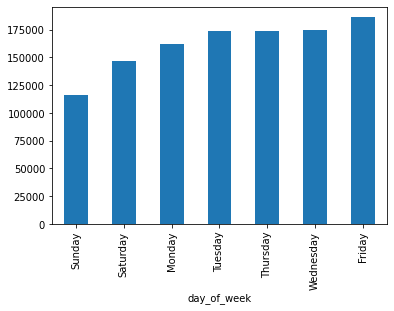

In [10]:
accident_infomation_day_of_week = accident_infomation.groupby("day_of_week")["accident_index"].count().sort_values()
accident_infomation_day_of_week.plot.bar()
plt.show()

### Car accident happen less when speed is higher 

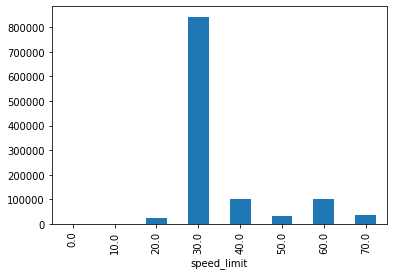

In [11]:
accident_infomation_speed_limit = accident_infomation.groupby("speed_limit")["accident_index"].size()
accident_infomation_speed_limit.plot.bar()
plt.show()

### Most of car accidents are slight accidents even the speed limit is higher

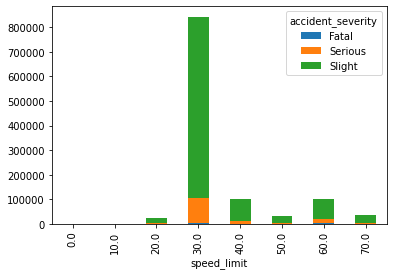

In [12]:
accident_infomation.groupby(["speed_limit", "accident_severity"]).size().unstack().plot(kind='bar', stacked=True)
plt.show()

# Vehicle Infomation Visualization

In [13]:
sql_query = f"select * from {schema_name}.{vehicle_table_name}"
print(sql_query)
vehicle_infomation = pd.read_sql_query(sql_query, con=engine)

select * from kaggle.stg_vehicle_information


###  The percentage comparing the different age bands for the incidents

In [14]:
vehicle_infomation_age_band_of_driver = vehicle_infomation.groupby("age_band_of_driver")["accident_index"].size()

In [15]:
vehicle_infomation_age_band_of_driver = vehicle_infomation_age_band_of_driver / vehicle_infomation_age_band_of_driver.sum() * 100
vehicle_infomation_age_band_of_driver = vehicle_infomation_age_band_of_driver[vehicle_infomation_age_band_of_driver > 1]


<AxesSubplot:ylabel='accident_index'>

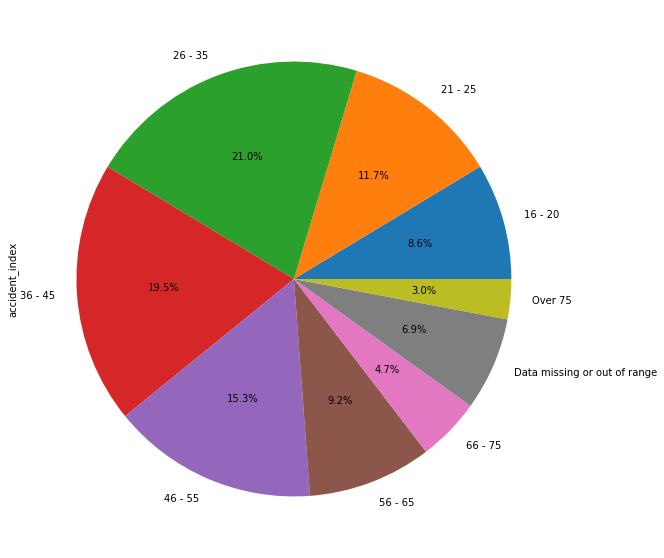

In [16]:
vehicle_infomation_age_band_of_driver.plot.pie(figsize=(15,10), autopct='%1.1f%%')

### The percentage comparing the different age of vehicles.

In [17]:
vehicle_infomation_age_of_vehicle = vehicle_infomation.groupby("age_of_vehicle")["accident_index"].size()

In [18]:
vehicle_infomation_age_of_vehicle = vehicle_infomation_age_of_vehicle / vehicle_infomation_age_of_vehicle.sum() * 100
vehicle_infomation_age_of_vehicle = vehicle_infomation_age_of_vehicle[vehicle_infomation_age_of_vehicle > 1]

<AxesSubplot:ylabel='accident_index'>

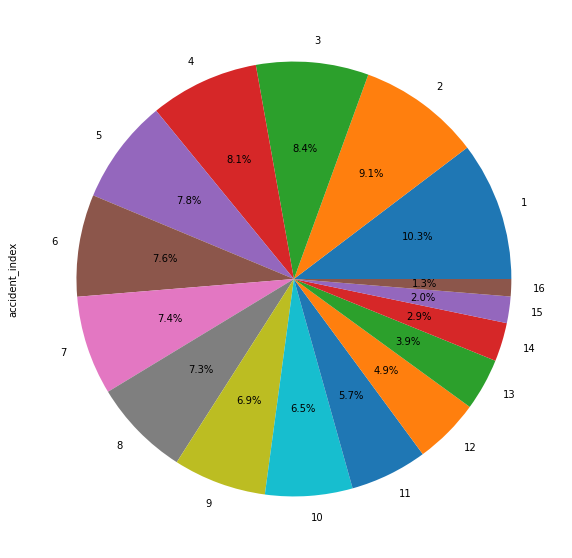

In [19]:
vehicle_infomation_age_of_vehicle.plot.pie(figsize=(15,10), autopct='%1.1f%%')

### One last insight, there are columns filled with "Data missing or out of range" in which the worst is the column "driver_home_area_type", shall discuss with the domain expert if we should drop these to clean our data set

In [20]:
for column in vehicle_infomation.columns:
    if vehicle_infomation[column].dtype == 'O' and \
       len(vehicle_infomation[vehicle_infomation[column].str.contains("Data missing or out of range")]) > 0:
        missing_values = vehicle_infomation[column].value_counts()["Data missing or out of range"] / \
        vehicle_infomation[column].value_counts().sum() * 100
        print(f'Column "{column}"" contains {missing_values}% of missing or out of range data')
    

Column "age_band_of_driver"" contains 6.936989112494429% of missing or out of range data
Column "driver_home_area_type"" contains 13.313073332712962% of missing or out of range data
Column "hit_object_in_carriageway"" contains 0.011325846438664114% of missing or out of range data
Column "hit_object_off_carriageway"" contains 0.004163013826103566% of missing or out of range data
Column "journey_purpose_of_driver"" contains 5.378430200951126% of missing or out of range data
Column "junction_location"" contains 4.88792921896963% of missing or out of range data
Column "sex_of_driver"" contains 0.0018978445383707435% of missing or out of range data
Column "skidding_and_overturning"" contains 0.012550262269871045% of missing or out of range data
Column "vehicle_leaving_carriageway"" contains 0.00838724844376748% of missing or out of range data
Column "vehicle_manoeuvre"" contains 0.020264082006474712% of missing or out of range data
Column "was_vehicle_left_hand_drive"" contains 5.1276086179